**Комментарий от студента Титова Д.А.**

В блокноте исследуется предсказание Swin-Transformer

От оригинального кода была добавлено отображение тестируемого изображения и обновлена библиотека datasets

In [1]:
pip install --upgrade datasets

Predicted label: tabby, tabby cat


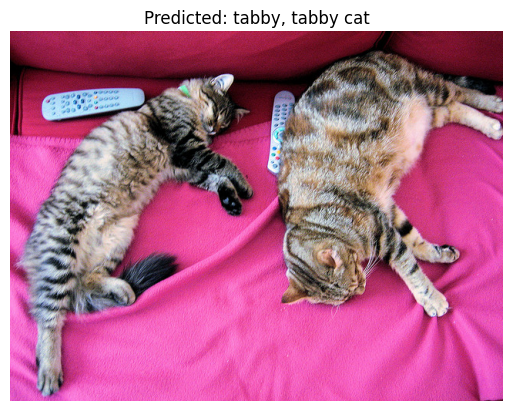

In [3]:
from datasets import load_dataset
from transformers import AutoImageProcessor, SwinForImageClassification
import torch
from PIL import Image
import matplotlib.pyplot as plt

model = SwinForImageClassification.from_pretrained(
    "microsoft/swin-tiny-patch4-window7-224"
)
image_processor = AutoImageProcessor.from_pretrained(
    "microsoft/swin-tiny-patch4-window7-224"
)

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

# Преобразуем изображение из формата PIL в формат NumPy для matplotlib
image_np = image.convert("RGB")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

predicted_label_id = logits.argmax(-1).item()
predicted_label_text = model.config.id2label[predicted_label_id]

print(f"Predicted label: {predicted_label_text}")

# Отображение изображения
plt.imshow(image_np)
plt.title(f"Predicted: {predicted_label_text}")
plt.axis('off')  # Отключаем оси
plt.show()

In [4]:
from google.colab import files
upload = files.upload()

Saving photo_2025-05-31_18-59-35.jpg to photo_2025-05-31_18-59-35 (1).jpg


Predicted label: toy poodle


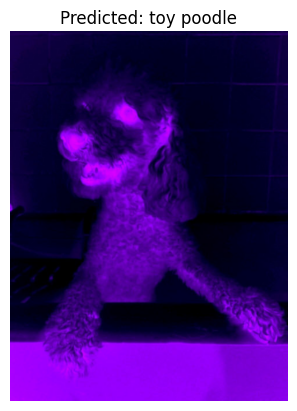

In [5]:
from io import BytesIO  # needed to read the uploaded image
# Get the filename of the uploaded image
filename = list(upload.keys())[0]

# Open the image using PIL
try:
    image = Image.open(BytesIO(upload[filename]))  # Read from bytes
except Exception as e:
    print(f"Error opening image: {e}")
    exit()

# Process the image
inputs = image_processor(image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    logits = model(**inputs).logits

# Get the predicted label
predicted_label_id = logits.argmax(-1).item()
predicted_label_text = model.config.id2label[predicted_label_id]

print(f"Predicted label: {predicted_label_text}")

# Display the image
plt.imshow(image)
plt.title(f"Predicted: {predicted_label_text}")
plt.axis('off')
plt.show()